In [1]:
#Load all necessary libraries that could be use along the journey of cleaning the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# I load my datasets and name it "fifa_dirty" to check what columns needed to be cleaned up

fifa_dirty = pd.read_csv("C://Users//user 1//Desktop//DataCleaningChallenge//archive//fifa21_unclean_2.csv", low_memory=False)
fifa_dirty.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


##### The dataset, from brief information given from above shows we have 77 columns to work with. this is large and my notebook cannot give me a clearer picture of every column at a glance. 

##### Because i want to get myself familiar with every column's data, i had divide my data along the columns to four datasets, then check for missing values and know those with sprecial characters that needs to be dropped


In [3]:
fifa_unclean_1 = fifa_dirty.iloc[:,0:20]
fifa_unclean_2 = fifa_dirty.iloc[:,20:40]
fifa_unclean_3 = fifa_dirty.iloc[:,40:60]
fifa_unclean_4 = fifa_dirty.iloc[:,60:]

In [4]:
fifa_unclean_1.isnull().sum(),

(ID                    0
 Name                  0
 LongName              0
 photoUrl              0
 playerUrl             0
 Nationality           0
 Age                   0
 ↓OVA                  0
 POT                   0
 Club                  0
 Contract              0
 Positions             0
 Height                0
 Weight                0
 Preferred Foot        0
 BOV                   0
 Best Position         0
 Joined                0
 Loan Date End     17966
 Value                 0
 dtype: int64,)

In [5]:
fifa_unclean_2.isnull().sum(),

(Wage                0
 Release Clause      0
 Attacking           0
 Crossing            0
 Finishing           0
 Heading Accuracy    0
 Short Passing       0
 Volleys             0
 Skill               0
 Dribbling           0
 Curve               0
 FK Accuracy         0
 Long Passing        0
 Ball Control        0
 Movement            0
 Acceleration        0
 Sprint Speed        0
 Agility             0
 Reactions           0
 Balance             0
 dtype: int64,)

In [6]:
fifa_unclean_3.isnull().sum(),

(Power              0
 Shot Power         0
 Jumping            0
 Stamina            0
 Strength           0
 Long Shots         0
 Mentality          0
 Aggression         0
 Interceptions      0
 Positioning        0
 Vision             0
 Penalties          0
 Composure          0
 Defending          0
 Marking            0
 Standing Tackle    0
 Sliding Tackle     0
 Goalkeeping        0
 GK Diving          0
 GK Handling        0
 dtype: int64,)

In [7]:
fifa_unclean_4.isnull().sum(),

(GK Kicking           0
 GK Positioning       0
 GK Reflexes          0
 Total Stats          0
 Base Stats           0
 W/F                  0
 SM                   0
 A/W                  0
 D/W                  0
 IR                   0
 PAC                  0
 SHO                  0
 PAS                  0
 DRI                  0
 DEF                  0
 PHY                  0
 Hits              2595
 dtype: int64,)

In [8]:
fifa_unclean_4.head()

,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


##### after checking all my columns, the next is to extract the columns that needs cleaning into a  single dataset and start working on them from column to column.

In [9]:
fifa_to_clean = fifa_dirty[['ID','Club', 'Contract', 'Height', 'Weight', 'Joined', 'Value', 'Wage', 'Release Clause', 'W/F','SM','IR', 'Hits']]

In [10]:
fifa_cleaning = fifa_to_clean.copy()
fifa_cleaning.head()

,ID,Club,Contract,Height,Weight,Joined,Value,Wage,Release Clause,W/F,SM,IR,Hits
0,158023,\n\n\n\nFC Barcelona,2004 ~ 2021,170cm,72kg,"Jul 1, 2004",€103.5M,€560K,€138.4M,4 ★,4★,5 ★,771
1,20801,\n\n\n\nJuventus,2018 ~ 2022,187cm,83kg,"Jul 10, 2018",€63M,€220K,€75.9M,4 ★,5★,5 ★,562
2,200389,\n\n\n\nAtlético Madrid,2014 ~ 2023,188cm,87kg,"Jul 16, 2014",€120M,€125K,€159.4M,3 ★,1★,3 ★,150
3,192985,\n\n\n\nManchester City,2015 ~ 2023,181cm,70kg,"Aug 30, 2015",€129M,€370K,€161M,5 ★,4★,4 ★,207
4,190871,\n\n\n\nParis Saint-Germain,2017 ~ 2022,175cm,68kg,"Aug 3, 2017",€132M,€270K,€166.5M,5 ★,5★,5 ★,595


###### let's import regular expression and write a function to drop special characters in Club's column

In [11]:
import regex as re

In [12]:
pattern = re.compile(r'[\n\n"cm€]')

def remove_xter(s):
    s = re.sub(pattern, '', s)
    return s  

In [13]:
fifa_cleaning["Club"] = fifa_cleaning["Club"].apply(remove_xter)
fifa_cleaning.head()

,ID,Club,Contract,Height,Weight,Joined,Value,Wage,Release Clause,W/F,SM,IR,Hits
0,158023,FC Barelona,2004 ~ 2021,170cm,72kg,"Jul 1, 2004",€103.5M,€560K,€138.4M,4 ★,4★,5 ★,771
1,20801,Juventus,2018 ~ 2022,187cm,83kg,"Jul 10, 2018",€63M,€220K,€75.9M,4 ★,5★,5 ★,562
2,200389,Atlétio Madrid,2014 ~ 2023,188cm,87kg,"Jul 16, 2014",€120M,€125K,€159.4M,3 ★,1★,3 ★,150
3,192985,Manhester City,2015 ~ 2023,181cm,70kg,"Aug 30, 2015",€129M,€370K,€161M,5 ★,4★,4 ★,207
4,190871,Paris Saint-Gerain,2017 ~ 2022,175cm,68kg,"Aug 3, 2017",€132M,€270K,€166.5M,5 ★,5★,5 ★,595


###### to clean the Contract column, we call our column as a string and split along ~. so let's do it

In [14]:
fifa_cleaning["Contract"]= fifa_cleaning["Contract"].str.replace('~', '-')
fifa_cleaning.head()

,ID,Club,Contract,Height,Weight,Joined,Value,Wage,Release Clause,W/F,SM,IR,Hits
0,158023,FC Barelona,2004 - 2021,170cm,72kg,"Jul 1, 2004",€103.5M,€560K,€138.4M,4 ★,4★,5 ★,771
1,20801,Juventus,2018 - 2022,187cm,83kg,"Jul 10, 2018",€63M,€220K,€75.9M,4 ★,5★,5 ★,562
2,200389,Atlétio Madrid,2014 - 2023,188cm,87kg,"Jul 16, 2014",€120M,€125K,€159.4M,3 ★,1★,3 ★,150
3,192985,Manhester City,2015 - 2023,181cm,70kg,"Aug 30, 2015",€129M,€370K,€161M,5 ★,4★,4 ★,207
4,190871,Paris Saint-Gerain,2017 - 2022,175cm,68kg,"Aug 3, 2017",€132M,€270K,€166.5M,5 ★,5★,5 ★,595


##### to clean the Height and Weight, i should check for unique to see if it is only cm and kg respectively, are the only characters i want to remove or other characters are there. 

--- to clean this i can do two things:
----1. drop index from the back or 
-----2. add the characters to my regex and drop. but i will do 1

In [15]:
#let's rename our height to Height(cm)
fifa_cleaning = fifa_cleaning.rename(columns= {"Height": "Height(cm)"})

In [16]:
#let's also rename our Weight to Weight(cm)
fifa_cleaning = fifa_cleaning.rename(columns= {"Weight": "Weight(cm)"})

In [17]:
fifa_cleaning["Height(cm)"].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

def remove_unit(h):
    for i in h:
        for j in i:
            if "\"" in j:
                j= ((j[1]*12)+j[-2])*2.54
            else:
                if "cm" in j:
                    return j[:-3]
                else:
                    return j
            return i
    

In [18]:
fifa_cleaning["Height(cm)"] = fifa_cleaning["Height(cm)"].apply(remove_xter)
fifa_cleaning.head()

,ID,Club,Contract,Height(cm),Weight(cm),Joined,Value,Wage,Release Clause,W/F,SM,IR,Hits
0,158023,FC Barelona,2004 - 2021,170,72kg,"Jul 1, 2004",€103.5M,€560K,€138.4M,4 ★,4★,5 ★,771
1,20801,Juventus,2018 - 2022,187,83kg,"Jul 10, 2018",€63M,€220K,€75.9M,4 ★,5★,5 ★,562
2,200389,Atlétio Madrid,2014 - 2023,188,87kg,"Jul 16, 2014",€120M,€125K,€159.4M,3 ★,1★,3 ★,150
3,192985,Manhester City,2015 - 2023,181,70kg,"Aug 30, 2015",€129M,€370K,€161M,5 ★,4★,4 ★,207
4,190871,Paris Saint-Gerain,2017 - 2022,175,68kg,"Aug 3, 2017",€132M,€270K,€166.5M,5 ★,5★,5 ★,595


In [19]:
fifa_cleaning["Height(cm)"].unique()

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166',
       "6'2", '164', '198', "6'3", "6'5", "5'11", "6'4", "6'1", "6'0",
       "5'10", "5'9", "5'6", "5'7", "5'4", '201', '158', '162', '161',
       '160', '203', '157', '156', '202', '159', '206', '155'],
      dtype=object)

#### now, let's write a function to change feets and inches to centimetres

In [20]:
def convert_inch(h):
    if "'" in h:
        feet= int(h.split("'")[0])
        inches = int(h.split("'")[1])
        total_inches = feet*12+inches
        centimetres = int(total_inches*2.54)
        return centimetres
    return h

In [21]:
fifa_cleaning["Height(cm)"] = fifa_cleaning["Height(cm)"].apply(convert_inch)
fifa_cleaning.head()

,ID,Club,Contract,Height(cm),Weight(cm),Joined,Value,Wage,Release Clause,W/F,SM,IR,Hits
0,158023,FC Barelona,2004 - 2021,170,72kg,"Jul 1, 2004",€103.5M,€560K,€138.4M,4 ★,4★,5 ★,771
1,20801,Juventus,2018 - 2022,187,83kg,"Jul 10, 2018",€63M,€220K,€75.9M,4 ★,5★,5 ★,562
2,200389,Atlétio Madrid,2014 - 2023,188,87kg,"Jul 16, 2014",€120M,€125K,€159.4M,3 ★,1★,3 ★,150
3,192985,Manhester City,2015 - 2023,181,70kg,"Aug 30, 2015",€129M,€370K,€161M,5 ★,4★,4 ★,207
4,190871,Paris Saint-Gerain,2017 - 2022,175,68kg,"Aug 3, 2017",€132M,€270K,€166.5M,5 ★,5★,5 ★,595


In [22]:
fifa_cleaning["Height(cm)"].unique()

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166', 187,
       '164', '198', 190, 195, 180, 193, 185, 182, 177, 175, 167, 170,
       162, '201', '158', '162', '161', '160', '203', '157', '156', '202',
       '159', '206', '155'], dtype=object)

#### we will put the Weight column in the same process as that of Height in our cleaning

In [23]:
#let's work on Weight
fifa_cleaning["Weight(cm)"].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

##### The unique() above shows us we have pounds(lbs) to convert to kg. we will write function just as we did with Height column to do this

In [24]:

def convert_to_kg(p):
    if "kg"in p:
        p= int(p[:-2])
    else:
        if "lbs" in p:
            p= int(int(p[:-3])*0.45)
        return p
    return p

In [25]:
fifa_cleaning["Weight(cm)"] = fifa_cleaning["Weight(cm)"].apply(convert_to_kg)

In [26]:
fifa_cleaning["Weight(cm)"].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52], dtype=int64)

##### let's write a function to change our "Joined" to datetime

In [27]:
from datetime import datetime

def to_datetime(j):
    to_date = datetime.strptime(j,"%b %d, %Y")
    return to_date.strftime("%Y-%m-%d")

In [28]:
fifa_cleaning["Joined"] = fifa_cleaning["Joined"].apply(to_datetime)
fifa_cleaning.head()

,ID,Club,Contract,Height(cm),Weight(cm),Joined,Value,Wage,Release Clause,W/F,SM,IR,Hits
0,158023,FC Barelona,2004 - 2021,170,72,2004-07-01,€103.5M,€560K,€138.4M,4 ★,4★,5 ★,771
1,20801,Juventus,2018 - 2022,187,83,2018-07-10,€63M,€220K,€75.9M,4 ★,5★,5 ★,562
2,200389,Atlétio Madrid,2014 - 2023,188,87,2014-07-16,€120M,€125K,€159.4M,3 ★,1★,3 ★,150
3,192985,Manhester City,2015 - 2023,181,70,2015-08-30,€129M,€370K,€161M,5 ★,4★,4 ★,207
4,190871,Paris Saint-Gerain,2017 - 2022,175,68,2017-08-03,€132M,€270K,€166.5M,5 ★,5★,5 ★,595


##### Let's work on the value column

In [29]:
fifa_cleaning["Value"].unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

###### Let's write a python function to write the figures in full but before that,i will add the euro character to my regex function above, so that i can use it to drop it. we will put the sign back in the column's name

In [30]:
def full_figure(m):
    m = str(m)
    if "M" in m:
        m= m[:-1]
        return int(float(m)*1_000_000)
    elif "K"in m:
        m= m[:-1]
        return int(float(m)*1_000)
    else:
        return m

In [31]:
fifa_cleaning["Value"] = fifa_cleaning["Value"].apply(remove_xter)
fifa_cleaning["Value"] = fifa_cleaning["Value"].apply(full_figure)
fifa_cleaning["Value"].unique()

array([103500000, 63000000, 120000000, 129000000, 132000000, 111000000,
       120500000, 102000000, 185500000, 110000000, 113000000, 90500000,
       82000000, 17500000, 83500000, 33500000, 114500000, 78000000,
       103000000, 109000000, 92000000, 10000000, 76500000, 89500000,
       87500000, 79500000, 124000000, 114000000, 95000000, 92500000,
       105500000, 88500000, 85000000, 81500000, 26000000, 21000000,
       56000000, 67500000, 53000000, 36500000, 51000000, 65500000,
       46500000, 61500000, 72500000, 77500000, 43500000, 32500000,
       36000000, 32000000, 54000000, 49500000, 57000000, 66500000,
       74500000, 71500000, 121000000, 99000000, 67000000, 86500000,
       93500000, 70000000, 62000000, 66000000, 58000000, 44000000,
       81000000, 37000000, 14500000, 46000000, 47500000, 52500000,
       54500000, 34500000, 57500000, 51500000, 44500000, 55000000,
       48000000, 60500000, 63500000, 61000000, 29000000, 58500000,
       55500000, 42000000, 40500000, 43000000

In [32]:
fifa_cleaning.head()

,ID,Club,Contract,Height(cm),Weight(cm),Joined,Value,Wage,Release Clause,W/F,SM,IR,Hits
0,158023,FC Barelona,2004 - 2021,170,72,2004-07-01,103500000,€560K,€138.4M,4 ★,4★,5 ★,771
1,20801,Juventus,2018 - 2022,187,83,2018-07-10,63000000,€220K,€75.9M,4 ★,5★,5 ★,562
2,200389,Atlétio Madrid,2014 - 2023,188,87,2014-07-16,120000000,€125K,€159.4M,3 ★,1★,3 ★,150
3,192985,Manhester City,2015 - 2023,181,70,2015-08-30,129000000,€370K,€161M,5 ★,4★,4 ★,207
4,190871,Paris Saint-Gerain,2017 - 2022,175,68,2017-08-03,132000000,€270K,€166.5M,5 ★,5★,5 ★,595


##### We should be able to apply the full_figure() function to our next two columns i.e the Wage and Release Clause. so let's do it....

In [33]:
fifa_cleaning["Wage"] = fifa_cleaning["Wage"].apply(remove_xter)
fifa_cleaning["Wage"] = fifa_cleaning["Wage"].apply(full_figure)
fifa_cleaning["Wage"].unique()

array([560000, 220000, 125000, 370000, 270000, 240000, 250000, 160000,
       260000, 210000, 310000, 130000, 350000, 300000, 190000, 145000,
       195000, 100000, 140000, 290000, 82000, 110000, 230000, 155000,
       200000, 165000, 95000, 170000, 105000, 115000, 150000, 135000,
       55000, 58000, 81000, 34000, 120000, 59000, 90000, 65000, 56000,
       71000, 18000, 75000, 47000, 20000, 84000, 86000, 74000, 78000,
       27000, 68000, 85000, 25000, 46000, 83000, 54000, 79000, 175000,
       43000, 49000, 45000, 38000, 41000, 39000, 23000, 51000, 50000,
       87000, 30000, 14000, 69000, 31000, 64000, 53000, 35000, 21000,
       28000, 17000, 33000, 70000, 32000, 89000, 26000, 40000, 76000,
       72000, 48000, 36000, 29000, 60000, 16000, 37000, 24000, 52000, '0',
       62000, 73000, 63000, 19000, 1000, 66000, 80000, 12000, 2000, 42000,
       13000, '900', 57000, 77000, 61000, 22000, 67000, 44000, 15000,
       11000, 8000, '850', 10000, 88000, '500', 7000, 6000, 9000, 5000,
    

In [34]:
fifa_cleaning["Release Clause"] = fifa_cleaning["Release Clause"].apply(remove_xter)
fifa_cleaning["Release Clause"] = fifa_cleaning["Release Clause"].apply(full_figure)
fifa_cleaning["Release Clause"].unique()

array([138400000, 75900000, 159400000, ..., 59000, 35000, 64000],
      dtype=object)

In [35]:
fifa_cleaning.head()

,ID,Club,Contract,Height(cm),Weight(cm),Joined,Value,Wage,Release Clause,W/F,SM,IR,Hits
0,158023,FC Barelona,2004 - 2021,170,72,2004-07-01,103500000,560000,138400000,4 ★,4★,5 ★,771
1,20801,Juventus,2018 - 2022,187,83,2018-07-10,63000000,220000,75900000,4 ★,5★,5 ★,562
2,200389,Atlétio Madrid,2014 - 2023,188,87,2014-07-16,120000000,125000,159400000,3 ★,1★,3 ★,150
3,192985,Manhester City,2015 - 2023,181,70,2015-08-30,129000000,370000,161000000,5 ★,4★,4 ★,207
4,190871,Paris Saint-Gerain,2017 - 2022,175,68,2017-08-03,132000000,270000,166500000,5 ★,5★,5 ★,595


##### The next is to drop the stars characters in  "W/F", "SM", and "IR"

In [36]:
fifa_cleaning["W/F"].unique()

array(['4 ★', '3 ★', '5 ★', '2 ★', '1 ★'], dtype=object)

In [37]:
# we will use the lambda function in cleaning all of W/F, SM, IR . so let's go

fifa_cleaning["W/F"] = [y[:-1] for y in fifa_cleaning["W/F"]]
fifa_cleaning["SM"] = [y[:-1] for y in fifa_cleaning["SM"]]
fifa_cleaning["IR"] = [y[:-1] for y in fifa_cleaning["IR"]]
fifa_cleaning.head()

,ID,Club,Contract,Height(cm),Weight(cm),Joined,Value,Wage,Release Clause,W/F,SM,IR,Hits
0,158023,FC Barelona,2004 - 2021,170,72,2004-07-01,103500000,560000,138400000,4,4,5,771
1,20801,Juventus,2018 - 2022,187,83,2018-07-10,63000000,220000,75900000,4,5,5,562
2,200389,Atlétio Madrid,2014 - 2023,188,87,2014-07-16,120000000,125000,159400000,3,1,3,150
3,192985,Manhester City,2015 - 2023,181,70,2015-08-30,129000000,370000,161000000,5,4,4,207
4,190871,Paris Saint-Gerain,2017 - 2022,175,68,2017-08-03,132000000,270000,166500000,5,5,5,595


##### our dataset is almost attaining  the cleaned status . the only column left is the Hits column. so let's check it out and work on it...

<AxesSubplot:>

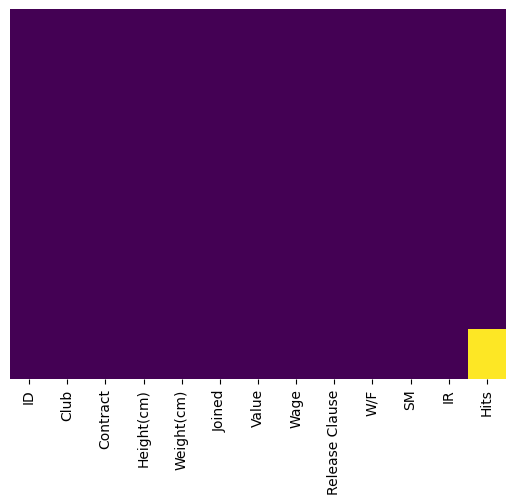

In [38]:
sns.heatmap(fifa_cleaning.isnull(), cbar= False, yticklabels=False, cmap="viridis")

##### from the hitmap above, Hits column has few unclean data. the null value is small. that shouldn't affect the outcome of our analysis if we want to go ahead with analysis. therefore, we will drop them..but before then let's check the amount of NaN, then we decide either to drop them or fill with something else...

In [39]:
fifa_cleaning.tail()

,ID,Club,Contract,Height(cm),Weight(cm),Joined,Value,Wage,Release Clause,W/F,SM,IR,Hits
18974,247223,Wuhan Zall,2018 - 2022,178,66,2018-07-13,100000,1000,70000,2,2,1,NaN
18975,258760,Oldha Athleti,2020 - 2021,175,65,2020-08-01,130000,500,165000,2,2,1,NaN
18976,252757,Derry City,2019 - 2020,179,74,2019-03-08,120000,500,131000,2,2,1,NaN
18977,243790,Dalian YiFang FC,2020 - 2022,175,69,2020-09-22,100000,2000,88000,3,2,1,NaN
18978,252520,Dalian YiFang FC,2019 - 2023,188,75,2019-07-29,100000,1000,79000,3,2,1,NaN


#####  it looks as if we have more null value in our hand than expected, let's see if we can fill with mean or better still, ZERO. but before that, let check the total amount of null value

In [40]:
fifa_cleaning["Hits"].isnull().sum()

2595

##### instead of dropping it and missed out of the information for the other columns attached to the null value, the best thing to do is fill the missing value with zero

In [41]:
fifa_cleaning["Hits"].fillna(value=0, inplace= True)

In [42]:
fifa_cleaning["Hits"].unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

##### we need to convert the K to 1000 as display in the unique(). the best is to call our full_figure() function

In [43]:
fifa_cleaning["Hits"] = fifa_cleaning["Hits"].apply(full_figure)

In [44]:
fifa_cleaning["Hits"].unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', 1600,
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', 1100, '433', '242', '206', '177', 1500, '198', '459', '117',
       '119', '209', '84', '187', '165', '203', '65', '336', '126', '313',
       '124', '145', '538', '182', '101', '45', '377', '99', '194', '403',
       '414', '593', '374', '245', 3200, '266', '299', '309', '215',
       '265', '211', '112', '337', '70', '159', '688', '116', '63', '144',
       '123', '71', '224', '113', '168', '61', '89', '137', '278', '75',
       '148', '176', '197', '264', '214', '247', '402', '440', 1700, 2300,
       '171', '320', '657', '87', '259', '200', '255', '253', '196', '60',
       '97', '85', '169', '256', '132', '239', '166', '121', '109', '32',
       '46', '122', '48', '527', '199', '282', '51', 1900, '642', '155',
       '323', '288', '497', '509', '79', '49', '270', 

#### we have, to the best of our knowledge, clean up our dirty columns. the next thing to do is to use our ID column as index and return all the data back to the main dataset. we have to drop the URLS column in the dataset because it has zero analysis value. so, let's go.....

<AxesSubplot:>

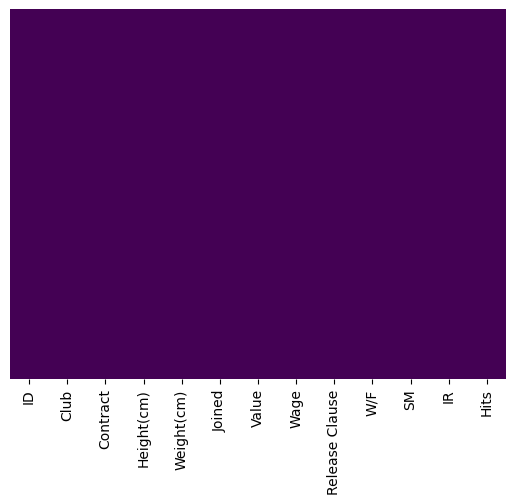

In [45]:
sns.heatmap(fifa_cleaning.isnull(), cbar= False, yticklabels=False, cmap="viridis")

#### So we come to the end of our data cleaning processses.  the next thing to do is to:

- merge our cleaned data to the dataset we scooped them from
- reset our index to ID column
- and rearrange our columns position if necessary


In [46]:
fifa_cleaning.set_index("ID", inplace = True)
fifa_cleaning.head()

,Club,Contract,Height(cm),Weight(cm),Joined,Value,Wage,Release Clause,W/F,SM,IR,Hits
ID,,,,,,,,,,,,
158023,FC Barelona,2004 - 2021,170,72,2004-07-01,103500000,560000,138400000,4,4,5,771
20801,Juventus,2018 - 2022,187,83,2018-07-10,63000000,220000,75900000,4,5,5,562
200389,Atlétio Madrid,2014 - 2023,188,87,2014-07-16,120000000,125000,159400000,3,1,3,150
192985,Manhester City,2015 - 2023,181,70,2015-08-30,129000000,370000,161000000,5,4,4,207
190871,Paris Saint-Gerain,2017 - 2022,175,68,2017-08-03,132000000,270000,166500000,5,5,5,595


In [47]:
fifa_dirty.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [48]:
len(fifa_dirty.columns)

77

In [49]:
fifa_dirty.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [50]:
fifa_cleaned = fifa_dirty[['ID','LongName','Nationality', 'Age','↓OVA', 'POT','Preferred Foot', 'BOV', 'Best Position','Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling','Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance','Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions','Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle','GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats','A/W', 'D/W','PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY']]

In [51]:
len(fifa_cleaned.columns)

55

In [52]:
len(fifa_cleaning.columns)

12

In [53]:
fifa_cleaned.head()

,ID,LongName,Nationality,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
0,158023,Lionel Messi,Argentina,33,93,93,Left,93,RW,429,...,2231,466,Medium,Low,85,92,91,95,38,65
1,20801,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Right,92,ST,437,...,2221,464,High,Low,89,93,81,89,35,77
2,200389,Jan Oblak,Slovenia,27,91,93,Right,91,GK,95,...,1413,489,Medium,Medium,87,92,78,90,52,90
3,192985,Kevin De Bruyne,Belgium,29,91,91,Right,91,CAM,407,...,2304,485,High,High,76,86,93,88,64,78
4,190871,Neymar da Silva Santos Jr.,Brazil,28,91,91,Right,91,LW,408,...,2175,451,High,Medium,91,85,86,94,36,59


##### merge

In [54]:
fifa2_cleaned_data = pd.merge(fifa_cleaning, fifa_cleaned, on="ID")

In [55]:
fifa2_cleaned_data.head()

,ID,Club,Contract,Height(cm),Weight(cm),Joined,Value,Wage,Release Clause,W/F,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
0,158023,FC Barelona,2004 - 2021,170,72,2004-07-01,103500000,560000,138400000,4,...,2231,466,Medium,Low,85,92,91,95,38,65
1,20801,Juventus,2018 - 2022,187,83,2018-07-10,63000000,220000,75900000,4,...,2221,464,High,Low,89,93,81,89,35,77
2,200389,Atlétio Madrid,2014 - 2023,188,87,2014-07-16,120000000,125000,159400000,3,...,1413,489,Medium,Medium,87,92,78,90,52,90
3,192985,Manhester City,2015 - 2023,181,70,2015-08-30,129000000,370000,161000000,5,...,2304,485,High,High,76,86,93,88,64,78
4,190871,Paris Saint-Gerain,2017 - 2022,175,68,2017-08-03,132000000,270000,166500000,5,...,2175,451,High,Medium,91,85,86,94,36,59


##### reset index

In [56]:
fifa2_cleaned_data.set_index("ID", inplace = True)
fifa2_cleaned_data.head()

,Club,Contract,Height(cm),Weight(cm),Joined,Value,Wage,Release Clause,W/F,SM,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
ID,,,,,,,,,,,,,,,,,,,,,
158023,FC Barelona,2004 - 2021,170,72,2004-07-01,103500000,560000,138400000,4,4,...,2231,466,Medium,Low,85,92,91,95,38,65
20801,Juventus,2018 - 2022,187,83,2018-07-10,63000000,220000,75900000,4,5,...,2221,464,High,Low,89,93,81,89,35,77
200389,Atlétio Madrid,2014 - 2023,188,87,2014-07-16,120000000,125000,159400000,3,1,...,1413,489,Medium,Medium,87,92,78,90,52,90
192985,Manhester City,2015 - 2023,181,70,2015-08-30,129000000,370000,161000000,5,4,...,2304,485,High,High,76,86,93,88,64,78
190871,Paris Saint-Gerain,2017 - 2022,175,68,2017-08-03,132000000,270000,166500000,5,5,...,2175,451,High,Medium,91,85,86,94,36,59


In [57]:
fifa2_cleaned_data.columns

Index(['Club', 'Contract', 'Height(cm)', 'Weight(cm)', 'Joined', 'Value',
       'Wage', 'Release Clause', 'W/F', 'SM', 'IR', 'Hits', 'LongName',
       'Nationality', 'Age', '↓OVA', 'POT', 'Preferred Foot', 'BOV',
       'Best Position', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Vision', 'Penalties',
       'Composure', 'Defending', 'Marking', 'Standing Tackle', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'A/W',
       'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')

##### lastly, we need to reindex to make some of our categorical and important information be at the front...let's do that using reindex()

In [58]:
new_index = ['LongName','Nationality','Club', 'Contract', 'Age','Height(cm)', 'Weight(cm)', 'Joined', 'Value',
       'Wage', 'Release Clause', 'W/F', 'SM', 'IR', 'Hits', '↓OVA', 'POT', 'Preferred Foot', 'BOV',
       'Best Position', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Vision', 'Penalties',
       'Composure', 'Defending', 'Marking', 'Standing Tackle', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'A/W',
       'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

In [59]:
fifa2_cleaned_data = fifa2_cleaned_data.reindex(columns= new_index)
fifa2_cleaned_data.head()

,LongName,Nationality,Club,Contract,Age,Height(cm),Weight(cm),Joined,Value,Wage,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
ID,,,,,,,,,,,,,,,,,,,,,
158023,Lionel Messi,Argentina,FC Barelona,2004 - 2021,33,170,72,2004-07-01,103500000,560000,...,2231,466,Medium,Low,85,92,91,95,38,65
20801,C. Ronaldo dos Santos Aveiro,Portugal,Juventus,2018 - 2022,35,187,83,2018-07-10,63000000,220000,...,2221,464,High,Low,89,93,81,89,35,77
200389,Jan Oblak,Slovenia,Atlétio Madrid,2014 - 2023,27,188,87,2014-07-16,120000000,125000,...,1413,489,Medium,Medium,87,92,78,90,52,90
192985,Kevin De Bruyne,Belgium,Manhester City,2015 - 2023,29,181,70,2015-08-30,129000000,370000,...,2304,485,High,High,76,86,93,88,64,78
190871,Neymar da Silva Santos Jr.,Brazil,Paris Saint-Gerain,2017 - 2022,28,175,68,2017-08-03,132000000,270000,...,2175,451,High,Medium,91,85,86,94,36,59


#### And we come to the end of our fifa_2 data cleaning challenge. thank you for walking this journey with me. i will leave you with the heatmap showing if we still have any missing value in our overall data

<AxesSubplot:ylabel='ID'>

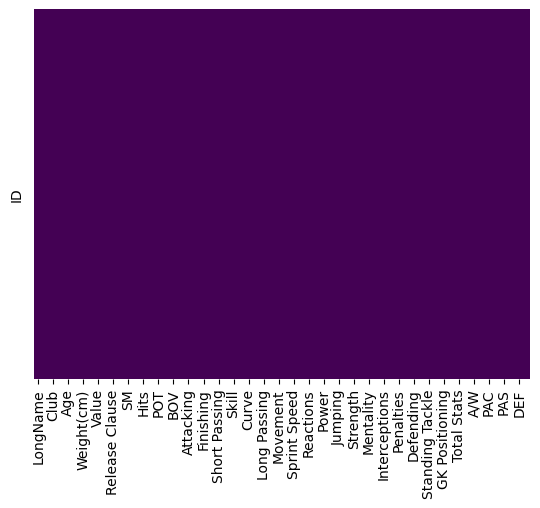

In [60]:
sns.heatmap(fifa2_cleaned_data.isnull(), cbar= False, yticklabels=False, cmap="viridis")

##### This is a clean and ready-to-work-with data. we can progress with asking some few questions with the data and doing analysis from there. Bye for now......AND SAVING MY DATASET BACK TO THE DIRECTORY

In [61]:
directory = "C://Users//user 1//Desktop//DataCleaningChallenge//archive"
filename = "fifa2_cleaned_data.csv"

path = directory + "/" + filename

fifa2_cleaned_data.to_csv(path, index= False)